# Figures 2 and 3

In [1]:
import pebbles 
import gas_properties
from constants import AU_TO_CM, M_PLUTO, M_SUN, G, YRS_TO_SEC
import numpy as np
import matplotlib.pyplot as plt
from pebble_accretion import focus_accretion, bondi_accretion, hill_accretion
import reader

In [2]:
# Independant Variables
R = 20  * AU_TO_CM  # cm
Z = 0.01
n_pebbles = 250

# Dependant Variables
T = gas_properties.gas_temp(R)
H = gas_properties.scale_height(T, R)
c_S = gas_properties.sound_speed(T)
Omega = gas_properties.kep_frequency(R)
Sigma = gas_properties.column_density(R, m_disk = 0.05 * M_SUN)
delta_v = 3000
rho_g = Sigma / (np.sqrt(2 * np.pi) * H)
rho_d = rho_g * Z

In [3]:
constant = pebbles.Pebbles(n_pebbles=n_pebbles, a_min = 1e-4, a_max=1, rho_sil = 3.0, rho_ice = 1.0, model="constant", scale_height=H, gas_density=rho_g)
constant_f = constant.volume_density_distribution(rho_d, alpha=1e-4)
constant_W = constant.column_density_distribution(Z=Z, gas_column_density=Sigma)

In [4]:
bimodal = pebbles.Pebbles(n_pebbles=n_pebbles, a_min = 1e-4, a_max=1, rho_sil = 3.2, rho_ice = 1.0, model="bimodal", scale_height=H, gas_density=rho_g)
bimodal_f = bimodal.volume_density_distribution(rho_d, alpha=1e-4)
bimodal_W = bimodal.column_density_distribution(Z=Z, gas_column_density=Sigma)

p=0.49712000000033774, k=2.990000000000011, q=0.5071200000003269


In [5]:
powerlaw = pebbles.Pebbles(n_pebbles=n_pebbles, a_min = 1e-4, a_max=1, rho_sil = 3.5, rho_ice = 1.0, model="decreasing", scale_height=H, gas_density=rho_g)
powerlaw_f = powerlaw.volume_density_distribution(rho_d, alpha=1e-4)
powerlaw_W = powerlaw.column_density_distribution(Z=Z, gas_column_density=Sigma)

In [6]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  

In [7]:
bimodal_da = np.gradient(bimodal.radius)
powerlaw_da = np.gradient(powerlaw.radius)
constant_da = np.gradient(constant.radius)

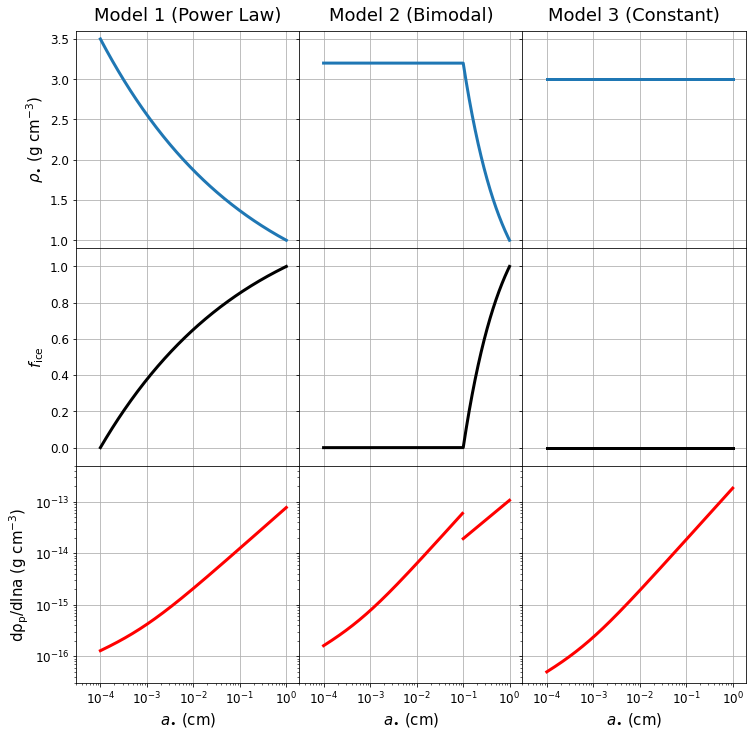

In [8]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey='row',figsize=(12, 12))
fig.subplots_adjust(wspace=0, hspace=0)

axes[0][0].plot(powerlaw.radius, powerlaw.density, linewidth=3)
axes[0][1].plot(bimodal.radius, bimodal.density, linewidth=3)
axes[0][2].plot(constant.radius, constant.density, linewidth=3)

axes[1][0].plot(powerlaw.radius, powerlaw.ice_fraction, linewidth=3, c="k")
axes[1][1].plot(bimodal.radius, bimodal.ice_fraction, linewidth=3, c="k")
axes[1][2].plot(constant.radius, constant.ice_fraction, linewidth=3, c="k")

axes[2][0].plot(powerlaw.radius, powerlaw_f / powerlaw_da * powerlaw.radius, linewidth=3, c="red")
axes[2][1].plot(bimodal.radius[np.where(bimodal.radius < 0.1)], bimodal_f[np.where(bimodal.radius < 0.1)] / bimodal_da[np.where(bimodal.radius < 0.1)] * bimodal.radius[np.where(bimodal.radius < 0.1)], linewidth=3, c="red")
axes[2][1].plot(bimodal.radius[np.where(bimodal.radius >= 0.1)], bimodal_f[np.where(bimodal.radius >= 0.1)] / bimodal_da[np.where(bimodal.radius >= 0.1)] * bimodal.radius[np.where(bimodal.radius >= 0.1)], linewidth=3, c="red")
# axes[2][1].plot(bimodal.radius, bimodal_f, linewidth=3)
axes[2][2].plot(constant.radius, constant_f / constant_da * constant.radius, linewidth=3, c="red")

axes[0][0].set_xscale('log')
axes[2][0].set_yscale('log')

for i in range(3):
    for j in range(3):
        axes[i][j].grid()


large = 18
medium = 15
small = 12
xsmall = 10

axes[0][0].set_title("Model 1 (Power Law)", fontsize=large, pad=xsmall)
axes[0][1].set_title("Model 2 (Bimodal)", fontsize=large, pad=xsmall)
axes[0][2].set_title("Model 3 (Constant)", fontsize=large, pad=xsmall)

axes[0][0].set_ylabel(r"$\rho_{\bullet} \ \rm{ (g \ cm}^{-3})$", fontsize=medium)
axes[1][0].set_ylabel(r"$f_{\rm{ice}}$", fontsize=medium)
axes[2][0].set_ylabel(r"$\rm{d}\rho_{p}/\rm{d}\ln a \ \rm{ (g \ cm}^{-3})$", fontsize=medium)
# axes[2][0].set_ylabel(r"$\rho_{p}(a)da \ \rm{ (g \ cm}^{-3})$", fontsize=medium)

axes[0][0].tick_params(labelsize=small)
axes[1][0].tick_params(labelsize=small)
axes[2][0].tick_params(labelsize=small)

axes[2][0].tick_params(labelsize=small)
axes[2][1].tick_params(labelsize=small)
axes[2][2].tick_params(labelsize=small)

axes[2][1].tick_params(labelsize=small)
axes[2][2].tick_params(labelsize=small)


axes[2][0].set_ylim(3e-17, 5e-13)
# axes[1][0].set_ylabel(r"$f_{\rm{ice}}$", fontsize=medium)
# axes[2][0].set_ylabel(r"$\rho_{p}(a)da \ \rm{ (g \ cm}^{-3})$", fontsize=medium)

axes[2][0].set_xlabel(r"$a_{\bullet} \ \rm{(cm)}$", fontsize=medium)
axes[2][1].set_xlabel(r"$a_{\bullet} \ \rm{(cm)}$", fontsize=medium)
axes[2][2].set_xlabel(r"$a_{\bullet} \ \rm{(cm)}$", fontsize=medium)


axes[0][0].set_ylim(0.9, 3.6)
axes[0][1].set_ylim(0.9, 3.6)
axes[0][2].set_ylim(0.9, 3.6)

axes[1][0].set_ylim(-0.1, 1.1)
axes[1][1].set_ylim(-0.1, 1.1)
axes[1][2].set_ylim(-0.1, 1.1)

axes[2][0].set_xlim(3e-5, 1.9)
axes[2][1].set_xlim(3e-5, 1.9)
axes[2][2].set_xlim(3e-5, 1.9)

plt.savefig("all_models_analysis.pdf", dpi=350)

In [9]:
n_mass = 75
masses = np.logspace(-5, 3, n_mass) * M_PLUTO

i_low_density = np.where(masses <= 1e-3 * M_PLUTO)[0]
i_high_density = np.where(2e-1 * M_PLUTO < masses)[0]

In [10]:
densities = np.zeros(n_mass)
densities[i_low_density] = 0.5
densities[i_high_density] = 2.0

mid_range_density = np.logspace(np.log10(0.5), np.log10(2.0), len(masses) - len(i_low_density) - len(i_high_density))
densities[max(i_low_density) + 1:min(i_high_density)] = mid_range_density

In [11]:
kbos = reader.KuiperBeltData()

In [12]:
focus_k = np.zeros([n_pebbles, n_mass])
bondi_k = np.zeros([n_pebbles, n_mass])
hill_k = np.zeros([n_pebbles, n_mass])
actual_k = np.zeros([n_pebbles, n_mass])
ice_frac_k = np.zeros(n_mass)

transition_mass = np.sqrt(1 / 3) * delta_v ** 3 / G / Omega * (1 / 8) / constant.St

for i in range(n_mass):
    for j in range(n_pebbles):
        focus_k[j, i] = focus_accretion(mass=masses[i], density=densities[i], rho_d=constant_f[j], Omega=Omega, St=constant.St[j], deltav=3000, H_g=H, alpha=1e-4)
        bondi_k[j, i] = bondi_accretion(m=masses[i], r=R, rho_d=constant_f[j], Omega=Omega, St=constant.St[j], deltav=3000, H_g=H)
        hill_k[j, i] = hill_accretion(m=masses[i], r=R, rho_d=constant_f[j], Omega=Omega, St=constant.St[j], deltav=3000, H_g=H)
        if masses[i] < transition_mass[j]:
            actual_k[j, i] = max(focus_k[j, i], bondi_k[j, i])
        else:
            actual_k[j, i] = hill_k[j, i]

for i in range(n_mass):
    for j in range(n_pebbles):
        ice_frac_k[i] += actual_k[j, i] / np.sum(actual_k, axis=0)[i] * constant.ice_fraction[j]
        

In [13]:
focus_bi = np.zeros([n_pebbles, n_mass])
bondi_bi = np.zeros([n_pebbles, n_mass])
hill_bi = np.zeros([n_pebbles, n_mass])
actual_bi = np.zeros([n_pebbles, n_mass])
ice_frac_bi = np.zeros(n_mass)

transition_mass = np.sqrt(1 / 3) * delta_v ** 3 / G / Omega * (1 / 8) / bimodal.St

for i in range(n_mass):
    for j in range(n_pebbles):
        focus_bi[j, i] = focus_accretion(mass=masses[i], density=densities[i], rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H, alpha=1e-4)
        bondi_bi[j, i] = bondi_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        hill_bi[j, i] = hill_accretion(m=masses[i], r=R, rho_d=bimodal_f[j], Omega=Omega, St=bimodal.St[j], deltav=3000, H_g=H)
        if masses[i] < transition_mass[j]:
            actual_bi[j, i] = max(focus_bi[j, i], bondi_bi[j, i])
        else:
            actual_bi[j, i] = hill_bi[j, i]

for i in range(n_mass):
    for j in range(n_pebbles):
        ice_frac_bi[i] += actual_bi[j, i] / np.sum(actual_bi, axis=0)[i] * bimodal.ice_fraction[j]

In [14]:
focus_pl = np.zeros([n_pebbles, n_mass])
bondi_pl = np.zeros([n_pebbles, n_mass])
hill_pl = np.zeros([n_pebbles, n_mass])
actual_pl = np.zeros([n_pebbles, n_mass])
ice_frac_pl = np.zeros(n_mass)

transition_mass = np.sqrt(1 / 3) * delta_v ** 3 / G / Omega * (1 / 8) / powerlaw.St

for i in range(n_mass):
    for j in range(n_pebbles):
        focus_pl[j, i] = focus_accretion(mass=masses[i], density=densities[i], rho_d=powerlaw_f[j], Omega=Omega, St=powerlaw.St[j], deltav=3000, H_g=H, alpha=1e-4)
        bondi_pl[j, i] = bondi_accretion(m=masses[i], r=R, rho_d=powerlaw_f[j], Omega=Omega, St=powerlaw.St[j], deltav=3000, H_g=H)
        hill_pl[j, i] = hill_accretion(m=masses[i], r=R, rho_d=powerlaw_f[j], Omega=Omega, St=powerlaw.St[j], deltav=3000, H_g=H)
        if masses[i] < transition_mass[j]:
            actual_pl[j, i] = max(focus_pl[j, i], bondi_pl[j, i])
        else:
            actual_pl[j, i] = hill_pl[j, i]

for i in range(n_mass):
    for j in range(n_pebbles):
        ice_frac_pl[i] += actual_pl[j, i] / np.sum(actual_pl, axis=0)[i] * powerlaw.ice_fraction[j]

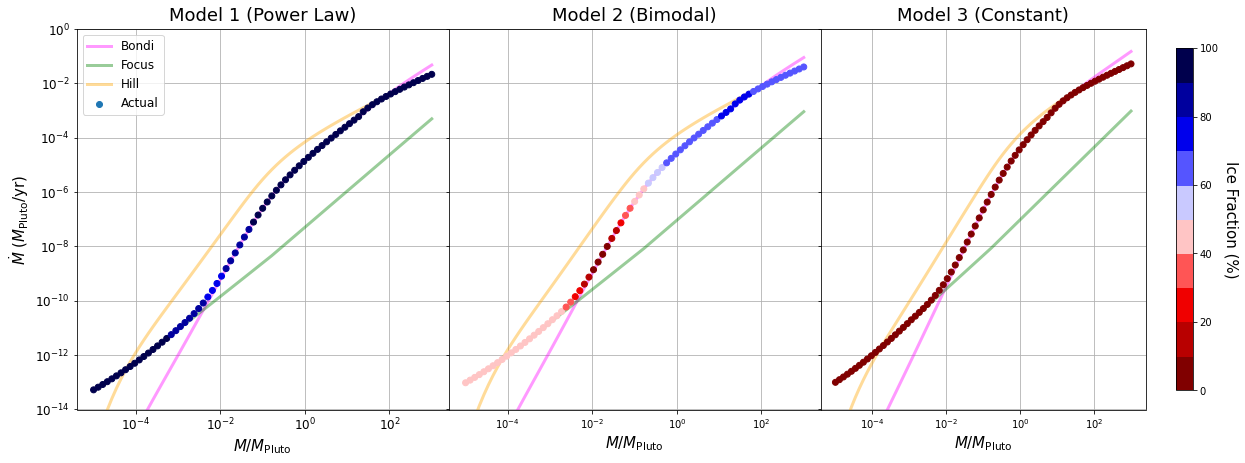

In [15]:
from matplotlib import colors
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey='row',figsize=(20, 7))
fig.subplots_adjust(wspace=0, hspace=0)

cmap = plt.cm.seismic_r
norm = colors.BoundaryNorm(np.arange(0, 110, 10), cmap.N)

# axes[0].plot(masses / M_PLUTO, np.sum(actual_pl, axis=0) / M_PLUTO * (2 * np.pi / Omega), label="Actual", c="k", linewidth=3, zorder=2.5)
# axes[1].plot(masses / M_PLUTO, np.sum(actual_bi, axis=0) / M_PLUTO * (2 * np.pi / Omega), label="Actual", c="k", linewidth=3, zorder=2.5)
# axes[2].plot(masses / M_PLUTO, np.sum(actual_k, axis=0) / M_PLUTO * (2 * np.pi / Omega), label="Actual", c="k", linewidth=3, zorder=2.5)

axes[0].plot(masses / M_PLUTO, np.sum(bondi_pl, axis=0) / M_PLUTO * YRS_TO_SEC, label="Bondi", c="magenta", linewidth=3, alpha=0.4)
axes[1].plot(masses / M_PLUTO, np.sum(bondi_bi, axis=0) / M_PLUTO * YRS_TO_SEC, label="Bondi", c="magenta", linewidth=3, alpha=0.4)
axes[2].plot(masses / M_PLUTO, np.sum(bondi_k, axis=0) / M_PLUTO * YRS_TO_SEC, label="Bondi", c="magenta", linewidth=3, alpha=0.4)

axes[0].plot(masses / M_PLUTO, np.sum(focus_pl, axis=0) / M_PLUTO * YRS_TO_SEC, label="Focus", c="green", linewidth=3, alpha=0.4)
axes[1].plot(masses / M_PLUTO, np.sum(focus_bi, axis=0) / M_PLUTO * YRS_TO_SEC, label="Focus", c="green", linewidth=3, alpha=0.4)
axes[2].plot(masses / M_PLUTO, np.sum(focus_k, axis=0) / M_PLUTO * YRS_TO_SEC, label="Focus", c="green", linewidth=3, alpha=0.4)

axes[0].plot(masses / M_PLUTO, np.sum(hill_pl, axis=0) / M_PLUTO * YRS_TO_SEC, label="Hill", c="orange", linewidth=3, alpha=0.4)
axes[1].plot(masses / M_PLUTO, np.sum(hill_bi, axis=0) / M_PLUTO * YRS_TO_SEC, label="Hill", c="orange", linewidth=3, alpha=0.4)
axes[2].plot(masses / M_PLUTO, np.sum(hill_k, axis=0) / M_PLUTO * YRS_TO_SEC, label="Hill", c="orange", linewidth=3, alpha=0.4)


axes[0].scatter(masses / M_PLUTO, np.sum(actual_pl, axis=0) / M_PLUTO * YRS_TO_SEC, label="Actual", c=ice_frac_pl * 100, norm=norm, cmap=cmap, zorder=3)
axes[1].scatter(masses / M_PLUTO, np.sum(actual_bi, axis=0) / M_PLUTO * YRS_TO_SEC, label="Actual", c=ice_frac_bi * 100, norm=norm, cmap=cmap, zorder=3)
img = axes[2].scatter(masses / M_PLUTO, np.sum(actual_k, axis=0) / M_PLUTO * YRS_TO_SEC, c=ice_frac_k * 100, label="Actual", norm=norm, cmap=cmap,  zorder=3)



axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_ylim(1e-14, 1e0)

axes[0].legend(fontsize=12)


axes[0].grid()
axes[1].grid()
axes[2].grid()

axes[0].set_title("Model 1 (Power Law)", fontsize=18, pad=8)
axes[1].set_title("Model 2 (Bimodal)", fontsize=18, pad=8)
axes[2].set_title("Model 3 (Constant)", fontsize=18, pad=8)

axes[0].set_ylabel(r"$\dot{M} \ (M_{\rm{Pluto}}/\rm{yr})$", fontsize=15)
axes[0].set_xlabel(r"$M / M_{\rm{Pluto}}$", fontsize=15)
axes[1].set_xlabel(r"$M / M_{\rm{Pluto}}$", fontsize=15)
axes[2].set_xlabel(r"$M / M_{\rm{Pluto}}$", fontsize=15)

axes[0].tick_params(labelsize=12)


cbar = fig.colorbar(img, ax=axes[2],fraction=0.046, pad=0.08)
cbar.set_label("Ice Fraction (%)", fontsize=15, labelpad=20, rotation=270)
plt.savefig("acc_rates.pdf", dpi=350, bbox_inches="tight")